<a href="https://colab.research.google.com/github/taro470/tutorial/blob/main/soturon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

日本語をタイトルやラベルに使うためのライブラリインストール

In [17]:
!pip install japanize-matplotlib

①　pingのプロット（3回分同時に表示）

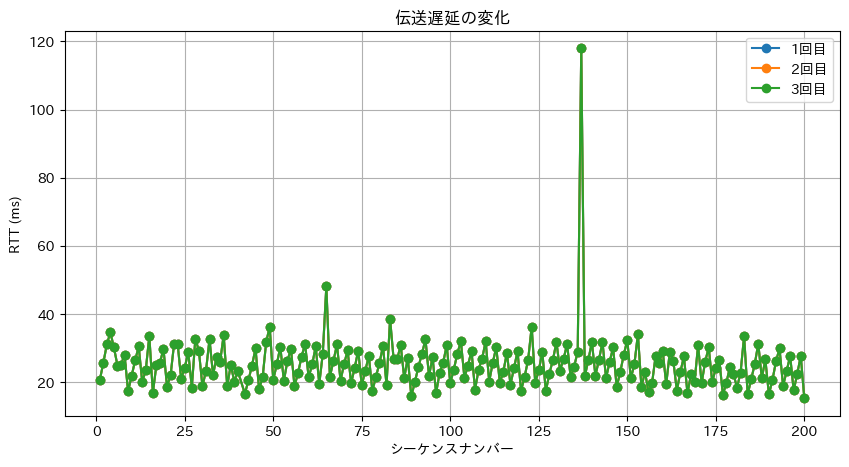

In [20]:
!pip install japanize-matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib


# # IPAフォントを指定
# font_path = "/usr/share/fonts/opentype/ipafont-gothic/IPAGothic.ttf"
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams["font.family"] = font_prop.get_name()

# Pythonコード: RTT vs Sequence Number グラフのプロット
import json

# グラフに表示するJSONファイルのリスト（ダミーのファイルパスを使用）
json_files = [
    "20250114183406_ping.json",  # 1回目のデータ
    "20250114183406_ping.json",  # 2回目のデータ
    "20250114183406_ping.json"   # 3回目のデータ
]

# ラベルリスト
labels = ["1回目", "2回目", "3回目"]

# グラフの作成
plt.figure(figsize=(10, 5))

for json_file, label in zip(json_files, labels):
    # JSONファイルの読み込み
    with open(json_file, "r") as file:
        data = json.load(file)

    # responsesからicmp_seqとtime_msを抽出
    responses = data.get("responses", [])
    icmp_seq = [entry["icmp_seq"] for entry in responses if "icmp_seq" in entry and "time_ms" in entry]
    time_ms = [entry["time_ms"] for entry in responses if "icmp_seq" in entry and "time_ms" in entry]

    # グラフにプロット
    plt.plot(icmp_seq, time_ms, marker="o", linestyle="-", label=label)

# グラフの設定
plt.title("伝送遅延の変化")
plt.xlabel("シーケンスナンバー")
plt.ylabel("RTT (ms)")
plt.grid(True)
plt.legend()  # 凡例に日本語フォントを適用

# グラフの表示
# plt.tight_layout()
plt.show()


（？）　パケットロス数のプロット

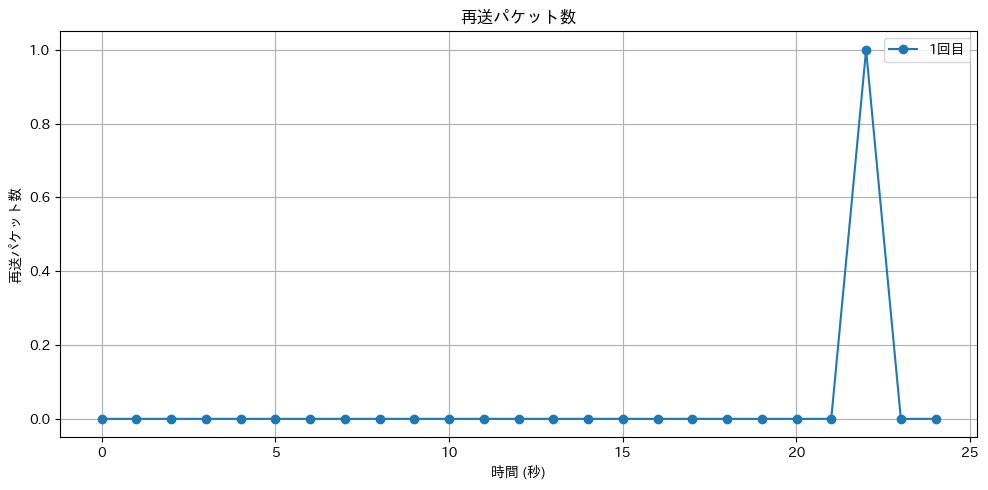

In [ ]:
with open("20250114170023_iperf3.json", "r") as file:
    data = json.load(file)

# 時間（秒）と再送パケット数（retransmits）のデータを抽出
intervals = data["intervals"]
time = [interval["streams"][0]["start"] for interval in intervals]
retransmits = [interval["streams"][0]["retransmits"] for interval in intervals]

# 再送パケット数が None の場合を 0 にする
retransmits = [value if value is not None else 0 for value in retransmits]

# グラフの作成
plt.figure(figsize=(10, 5))
plt.plot(time, retransmits, marker="o", linestyle="-", label="1回目")

# グラフの設定
plt.title("再送パケット数")
plt.xlabel("時間 (秒)")
plt.ylabel("再送パケット数")
plt.grid(True)
plt.legend()

# グラフの表示
plt.tight_layout()
plt.show()

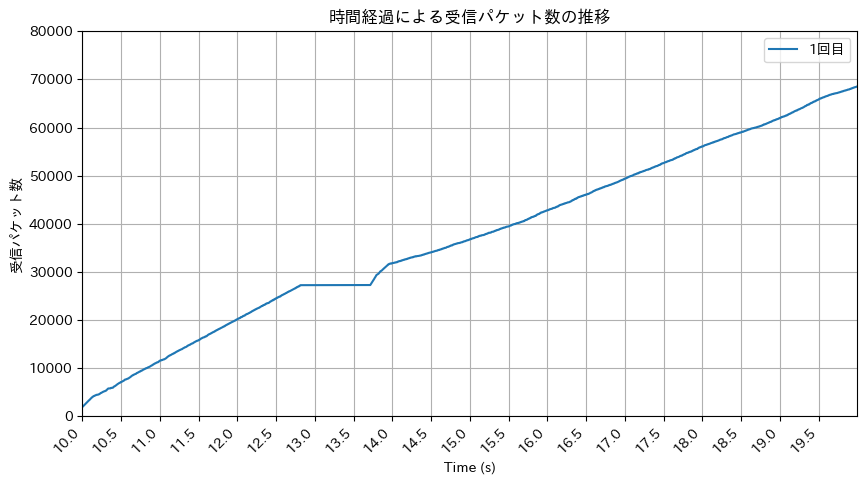

In [23]:
!pip install japanize-matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np  # 目盛り調整のために追加

# CSVファイルの読み込み
csv_file = "iperf3_DL_intraCU_01292320.csv"  # ファイル名を適宜変更してください
df = pd.read_csv(csv_file)

# "No." を 1 から始まる連番に変更
df["No."] = range(1, len(df) + 1)

# グラフの作成
plt.figure(figsize=(10, 5))
# plt.plot(df["Time"], df["No."], marker="o", linestyle="-", label="パケットNo.")
plt.plot(df["Time"], df["No."], marker=" ", linestyle="-", markersize=0.5, label="1回目")  # 点を小さくする

# **横軸の範囲を 12 ～ 15 に設定**
plt.xlim(10, 20)

# **横軸の目盛りを細かく設定（0.5秒間隔）**
plt.xticks(np.arange(10, 20, 0.5), rotation=45, ha="right")  # 0.5秒ごとにし、ラベルを斜めに

# **y軸の範囲を適切に調整**
plt.ylim(0,80000)

# グラフの設定
plt.title("時間経過による受信パケット数の推移")
plt.xlabel("Time (s)")
plt.ylabel("受信パケット数")
plt.grid(True)
plt.legend()

# グラフの表示
plt.show()

②　パケット送受信数の変化プロット

In [16]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np  # 目盛り調整のために追加

# CSVファイルの読み込み
csv_file = "iperf3_DL_intraCU_01292305.csv"  # ファイル名を適宜変更してください
df = pd.read_csv(csv_file)

# "No." を 1 から始まる連番に変更
df["No."] = range(1, len(df) + 1)

# グラフの作成
plt.figure(figsize=(10, 5))
# plt.plot(df["Time"], df["No."], marker="o", linestyle="-", label="パケットNo.")
plt.plot(df["Time"], df["No."], marker=" ", linestyle="-", markersize=0.5, label="一回目")  # 点を小さくする

# **横軸の範囲を 12 ～ 15 に設定**
# plt.xlim(10, 20)

# **横軸の目盛りを細かく設定（0.5秒間隔）**
# plt.xticks(np.arange(10, 20, 0.5), rotation=45, ha="right")  # 0.5秒ごとにし、ラベルを斜めに

# **y軸の範囲を適切に調整**
# plt.ylim(0,80000)

# グラフの設定
plt.title("時間経過による受信パケット数の推移")
plt.xlabel("Time (s)")
plt.ylabel("受信パケット数")
plt.grid(True)
plt.legend()

# グラフの表示
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=288d469ba47d9b9e52e1dbb6b7344242e94512cbfe128ef5b96c1b88c7246930
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


FileNotFoundError: [Errno 2] No such file or directory: 'iperf3_DL_intraCU_01292305.csv'

③　SS-RSRP、SS-SINRのグラフ出力

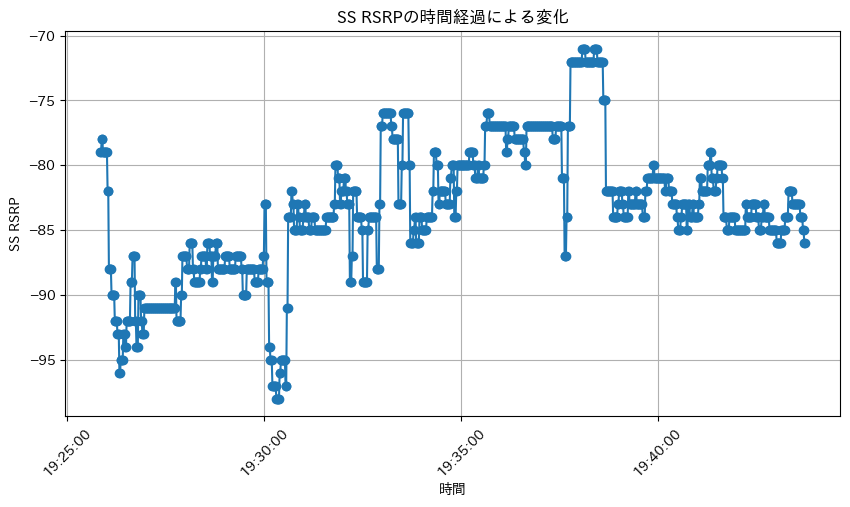

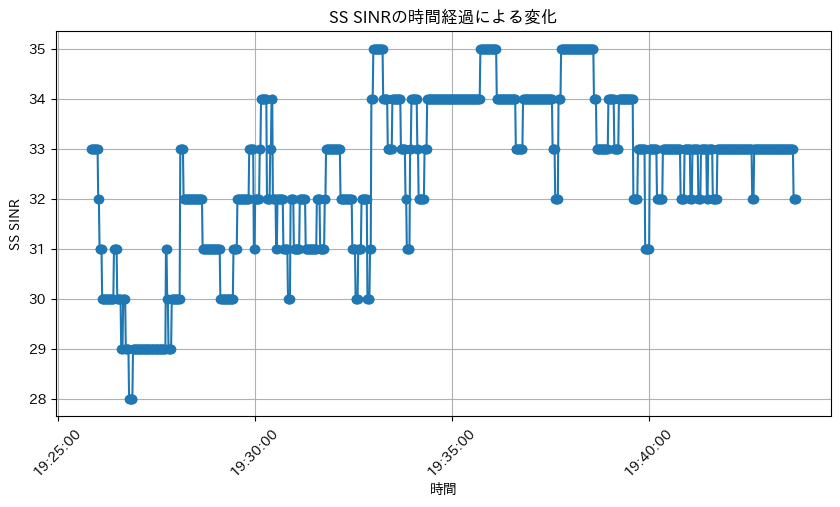

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.dates as mdates

# csvファイルの読み込み
df = pd.read_csv('セミナー室202406071925.csv')

# 'Time' 列を datetime 型に変換
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')

# RSRPとSINRのプロット関数
def plot_metric(df, metric, start_time=None, end_time=None):
    """
    指定したmetric（RSRPまたはSINR）をプロットする関数
    :param df: データフレーム
    :param metric: 'RSRP' または 'SINR'
    """
    # プロット
    plt.figure(figsize=(10, 5))
    plt.plot(df['Time'], df[metric], marker='o', linestyle='-')

    # 軸ラベルとタイトル
    plt.xlabel('時間')
    plt.ylabel(metric)
    plt.title(f'{metric}の時間経過による変化')

    # x軸のフォーマットを "時間:分:秒" に変更
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

    # x軸ラベルの回転とグリッド
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# 全データでRSRPとSINRをプロット
plot_metric(df, 'SS RSRP')
plot_metric(df, 'SS SINR')















































没

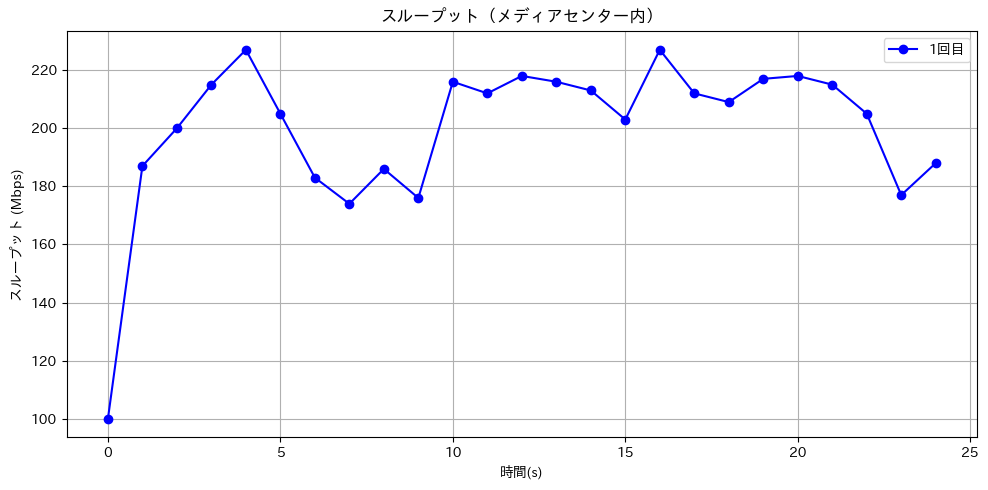

In [ ]:
import math

# JSONデータを読み込む
with open("20250114170023_iperf3.json", 'r') as file:
    data = json.load(file)

# 時間（秒）とスループット（bits_per_second）のデータを抽出
times = []
throughputs = []

for interval in data.get("intervals", []):
    start_time = interval["sum"]["start"]
    bits_per_second = interval["sum"]["bits_per_second"]

    # 秒単位の時間をリストに追加
    times.append(math.floor(start_time))

    # スループットをMbpsに変換し、小数点以下切り捨て
    throughputs.append(math.floor(bits_per_second / 1_000_000))  # Mbpsに変換

# グラフを作成
plt.figure(figsize=(10, 5))
plt.plot(times, throughputs, marker="o", linestyle="-", color="b", label="1回目")
plt.title("スループット（メディアセンター内）")
plt.xlabel("時間(s)")
plt.ylabel("スループット (Mbps)")
plt.grid(True)
plt.legend()

# グラフの表示
plt.tight_layout()
plt.show()

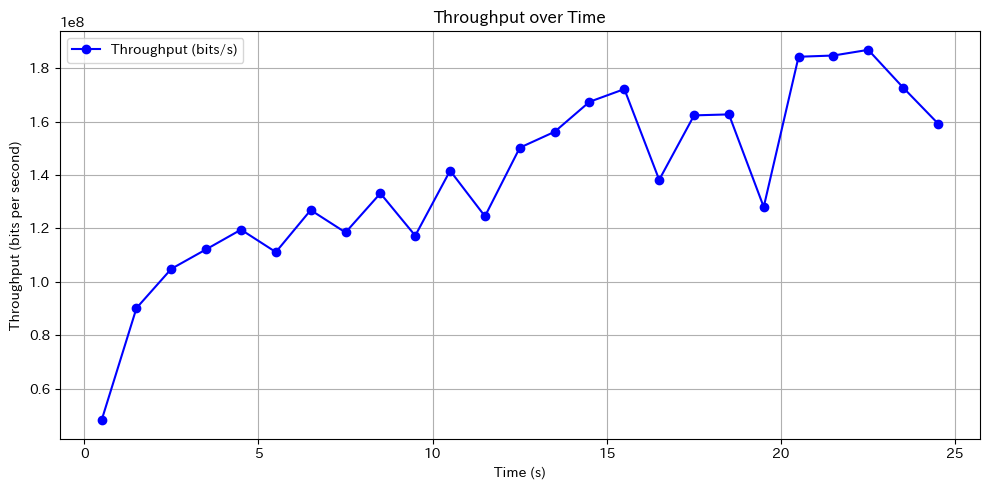

In [ ]:
# JSONデータを読み込む
json_file_path = "20250114171116_iperf3.json"

try:
    # JSONデータを読み込む
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    # 時間（秒）とスループット（bits_per_second）のデータを抽出
    times = []
    bit_rates = []

    for interval in data.get('intervals', []):  # intervalsキーが存在するかチェック
        start_time = interval['sum']['start']
        end_time = interval['sum']['end']
        avg_time = (start_time + end_time) / 2
        bit_rate = interval['sum']['bits_per_second']

        times.append(avg_time)
        bit_rates.append(bit_rate)

    # グラフを作成
    plt.figure(figsize=(10, 5))
    plt.plot(times, bit_rates, marker='o', linestyle='-', color='b', label='1回目')
    plt.title('Throughput over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Throughput (bits per second)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{json_file_path}' not found.")
except json.JSONDecodeError:
    print(f"Error: File '{json_file_path}' is not a valid JSON file or is empty.")


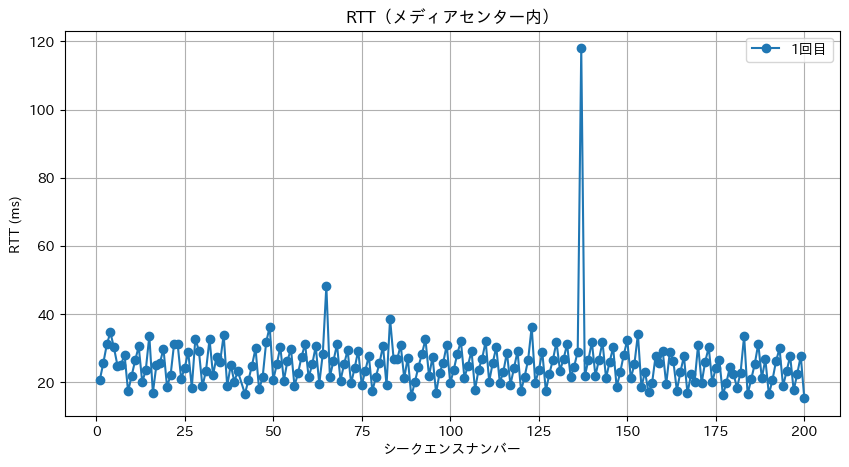

In [ ]:
# グラフに表示するJSONファイル（1つのファイルに変更）
json_file = "20250114183406_ping.json"  # ファイル名を指定

# ダミーデータ作成 (Google Colab 環境で動作確認用)
import os
if not os.path.exists(json_file):
    with open(json_file, "w") as f:
        json.dump({
            "responses": [
                {"icmp_seq": x, "time_ms": 20 + (x % 10)}
                for x in range(1, 201)
            ]
        }, f)

# グラフの作成
plt.figure(figsize=(10, 5))

# JSONファイルの読み込み
with open(json_file, "r") as file:
    data = json.load(file)

# responsesからicmp_seqとtime_msを抽出
responses = data.get("responses", [])
icmp_seq = [entry["icmp_seq"] for entry in responses if "icmp_seq" in entry and "time_ms" in entry]
time_ms = [entry["time_ms"] for entry in responses if "icmp_seq" in entry and "time_ms" in entry]

# グラフにプロット
plt.plot(icmp_seq, time_ms, marker="o", linestyle="-", label="1回目")

# グラフの設定
plt.title("RTT（メディアセンター内）")
plt.xlabel("シークエンスナンバー")
plt.ylabel("RTT (ms)")
plt.grid(True)
plt.legend()  # 凡例に日本語フォントを適用

# グラフの表示
plt.show()